In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv(r'C:\Users\Shanu\Desktop\Elevate Task\Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
X = data.drop(['Id', 'Species'], axis=1)  # features
y = data['Species']  #target

In [17]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X_normalized_data = pd.DataFrame(X_normalized, columns=X.columns)
X_normalized_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [21]:
print("Before Normalization:")
print(X.head())

print("\nAfter Normalization:")
print(X_normalized_data.head())

Before Normalization:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2

After Normalization:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.222222      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667


In [34]:
# Step 1: Import KNN and train/test split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized_data,  # our normalized features
    y,                # target labels
    test_size=0.2,    # 20% test set
    random_state=42   # reproducibility
)

# Step 3: Create KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Step 4: Fit the model to training data
knn.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
#experiment with different values of k 
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [40]:
#experiment with different values of k 
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

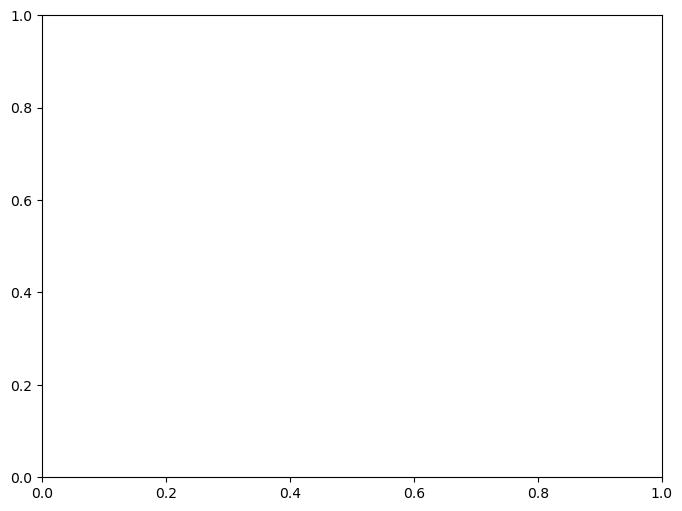

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Choose two features for visualization
X_plot = X_normalized_data[['PetalLengthCm', 'PetalWidthCm']]
y_plot = y

# Train/test split for visualization data
X_train_plot, X_test_plot, y_train_plot, y_test_plot = train_test_split(
    X_plot, y_plot, test_size=0.2, random_state=42
)

# Train KNN on the selected features
knn_plot = KNeighborsClassifier(n_neighbors=5)
knn_plot.fit(X_train_plot, y_train_plot)

# Create mesh grid for plotting decision boundaries
x_min, x_max = X_plot['PetalLengthCm'].min() - 0.1, X_plot['PetalLengthCm'].max() + 0.1
y_min, y_max = X_plot['PetalWidthCm'].min() - 0.1, X_plot['PetalWidthCm'].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict class for each point in the grid
Z = knn_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set2)

# Plot training points
scatter = plt.scatter(X_plot['PetalLengthCm'], X_plot['PetalWidthCm'],
                      c=pd.Categorical(y_plot).codes, edgecolor='k', cmap=plt.cm.Set2)

# Add labels and legend
plt.xlabel("Petal Length (normalized)")
plt.ylabel("Petal Width (normalized)")
plt.title("KNN Decision Boundaries (k=5)")
plt.show()